# Indice de contenido de clorofilas : ICC

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the Excel sheet
UV180 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV180', parse_dates=['H'])
UV250 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV250', parse_dates=['H'])
UV395 = pd.read_excel('DATOS T1 Y T9_V3.xlsx', sheet_name='UV395', parse_dates=['H'])


df = pd.concat([UV180, UV250, UV395], ignore_index=True)


# Remove the '°C' suffix from the 'Temperatura' column
df['Temperatura'] = df['Temperatura'].str.replace('°C', '')

df['Temperatura']= df['Temperatura'].astype('float')

# Display the dataframe
print(df.head())

   Temperatura    Hr      UV  DIA          H  Muestra     T1     T9
0         15.0  0.79  180 nm    1 2023-09-05        1  280.8  274.6
1         15.0  0.79  180 nm    1 2023-09-05        2  243.2  280.4
2         15.0  0.79  180 nm    1 2023-09-05        3  242.6  265.0
3         15.0  0.79  180 nm    1 2023-09-05        4  251.6  274.1
4         15.0  0.79  180 nm    1 2023-09-05        5  247.6  249.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperatura  1215 non-null   float64       
 1   Hr           1215 non-null   float64       
 2   UV           1215 non-null   object        
 3   DIA          1215 non-null   int64         
 4   H            1215 non-null   datetime64[ns]
 5   Muestra      1215 non-null   int64         
 6   T1           1215 non-null   float64       
 7   T9           1215 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 76.1+ KB


In [4]:
df['H']= df['H'].dt.time

In [5]:
df['H'].unique()

array([datetime.time(0, 0), datetime.time(5, 0), datetime.time(10, 0),
       datetime.time(15, 0), datetime.time(20, 0), datetime.time(1, 0),
       datetime.time(6, 0), datetime.time(11, 0), datetime.time(16, 0),
       datetime.time(21, 0), datetime.time(2, 0), datetime.time(7, 0),
       datetime.time(12, 0), datetime.time(17, 0), datetime.time(22, 0)],
      dtype=object)

In [6]:
# Combine 'day' and 'hour' into a single datetime column
df['Time'] = df['DIA'].astype(str) + ' ' + pd.to_datetime(df['H'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
df['Time'] = pd.to_datetime(df['Time'], format='%d %H:%M:%S')


df.head()

,Temperatura,Hr,UV,DIA,H,Muestra,T1,T9,Time
0,15.0,0.79,180 nm,1,00:00:00,1,280.8,274.6,1900-01-01
1,15.0,0.79,180 nm,1,00:00:00,2,243.2,280.4,1900-01-01
2,15.0,0.79,180 nm,1,00:00:00,3,242.6,265.0,1900-01-01
3,15.0,0.79,180 nm,1,00:00:00,4,251.6,274.1,1900-01-01
4,15.0,0.79,180 nm,1,00:00:00,5,247.6,249.2,1900-01-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperatura  1215 non-null   float64       
 1   Hr           1215 non-null   float64       
 2   UV           1215 non-null   object        
 3   DIA          1215 non-null   int64         
 4   H            1215 non-null   object        
 5   Muestra      1215 non-null   int64         
 6   T1           1215 non-null   float64       
 7   T9           1215 non-null   float64       
 8   Time         1215 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 85.6+ KB


In [8]:
time_difference = df['Time'] - df['Time'].iloc[0]

# Convert the time difference to hours
df['HOUR'] = time_difference.dt.total_seconds() / 3600

In [40]:
#len(df['Time'].unique())
df['HOUR'].unique()

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.,
       65., 70.])

In [10]:
df['UV'].value_counts()

250 nm    405
180 nm    405
395 nm    405
Name: UV, dtype: int64

In [11]:
print(df['UV'].unique())
print(df['DIA'].unique())
print(df['Muestra'].unique())

['180 nm' '250 nm' '395 nm']
[1 2 3]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]


In [12]:
df[['Temperatura', 'Hr', 'T1','T9']].describe()

,Temperatura,Hr,T1,T9
count,1215.000000,1215.000000,1215.000000,1215.000000
mean,14.246667,0.729400,225.888642,241.781811
std,3.054678,0.119549,84.437622,60.501606
min,9.500000,0.530000,10.200000,76.300000
25%,11.200000,0.610000,193.200000,206.750000
50%,14.700000,0.750000,241.200000,248.600000
75%,17.000000,0.840000,247.600000,267.250000
max,20.000000,0.910000,737.000000,763.800000


Text(0.5, 1.0, 'Material T1')

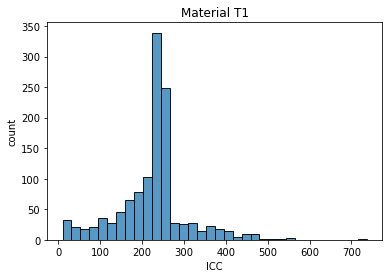

In [13]:
sns.histplot(data= df, x='T1', bins=int(np.sqrt(len(df)))) #binwidth=1)
plt.xlabel('ICC')
plt.ylabel('count')
plt.title('Material T1')

Text(0.5, 1.0, 'Material T9')

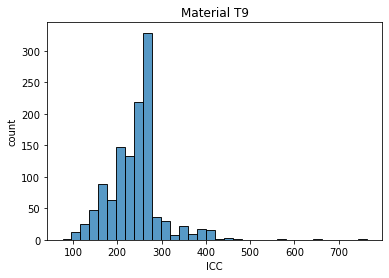

In [14]:
sns.histplot(data= df, x='T9', bins=int(np.sqrt(len(df)))) #binwidth=1)
plt.xlabel('ICC')
plt.ylabel('count')
plt.title('Material T9')

In [15]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

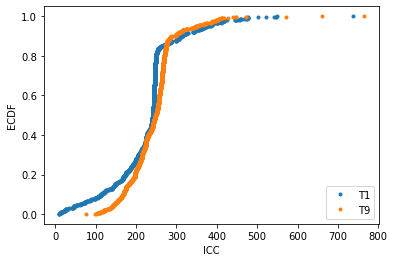

In [16]:
# Compute ECDFs
x_set, y_set = ecdf(df['T1'])
x_vers, y_vers = ecdf(df['T9'])

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')



# Annotate the plot
plt.legend(('T1', 'T9'), loc='lower right')
_ = plt.xlabel('ICC')
_ = plt.ylabel('ECDF')


[Text(0, 0, '$T_0$'),
 Text(1, 0, '$T_1$'),
 Text(2, 0, '$T_2$'),
 Text(3, 0, '$T_3$'),
 Text(4, 0, '$T_4$'),
 Text(5, 0, '$T_5}$'),
 Text(6, 0, '$T_6$'),
 Text(7, 0, '$T_7$'),
 Text(8, 0, '$T_8$'),
 Text(9, 0, '$T_9$'),
 Text(10, 0, '$T_{10}$'),
 Text(11, 0, '$T_{11}$'),
 Text(12, 0, '$T_{12}$'),
 Text(13, 0, '$T_{13}$'),
 Text(14, 0, '$T_{14}$')]

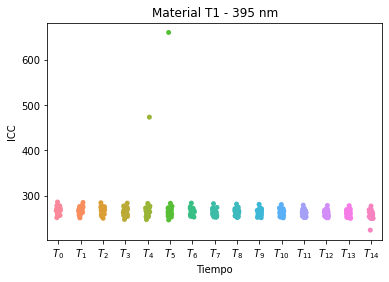

In [17]:
#g = sns.stripplot(x="Time", y="T1", data=df[df["UV"]=='180 nm'])
#g = sns.stripplot(x="Time", y="T9", data=df[df["UV"]=='180 nm'])
#g = sns.stripplot(x="Time", y="T1", data=df[df["UV"]=='250 nm'])
#g = sns.stripplot(x="Time", y="T9", data=df[df["UV"]=='250 nm'])
#g = sns.stripplot(x="Time", y="T1", data=df[df["UV"]=='395 nm'])
g = sns.stripplot(x="Time", y="T9", data=df[df["UV"]=='395 nm'])


g.set_xlabel('Tiempo')
g.set_ylabel('ICC')
g.set_title('Material T1 - 395 nm')
g.set_xticklabels(['$T_0$','$T_1$','$T_2$','$T_3$','$T_4$','$T_5}$','$T_6$', '$T_7$', '$T_8$', '$T_9$','$T_{10}$','$T_{11}$','$T_{12}$','$T_{13}$','$T_{14}$'])
                               

[Text(0, 0, '$T_0$'),
 Text(1, 0, '$T_1$'),
 Text(2, 0, '$T_2$'),
 Text(3, 0, '$T_3$'),
 Text(4, 0, '$T_4$'),
 Text(5, 0, '$T_5$'),
 Text(6, 0, '$T_6$'),
 Text(7, 0, '$T_7$'),
 Text(8, 0, '$T_8$'),
 Text(9, 0, '$T_9$'),
 Text(10, 0, '$T_{10}$'),
 Text(11, 0, '$T_{11}$'),
 Text(12, 0, '$T_{12}$'),
 Text(13, 0, '$T_{13}$'),
 Text(14, 0, '$T_{14}$')]

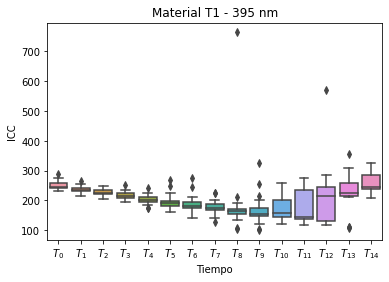

In [18]:
#g = sns.boxplot(x="Time", y="T1", data=df[df["UV"]=='180 nm'])
#g = sns.boxplot(x="Time", y="T9", data=df[df["UV"]=='180 nm'])
#g = sns.boxplot(x="Time", y="T1", data=df[df["UV"]=='250 nm'])
g = sns.boxplot(x="Time", y="T9", data=df[df["UV"]=='250 nm'])
#g = sns.boxplot(x="Time", y="T1", data=df[df["UV"]=='395 nm'])
#g = sns.boxplot(x="Time", y="T9", data=df[df["UV"]=='395 nm'])

g.set_xlabel('Tiempo')
g.set_ylabel('ICC')
g.set_title('Material T1 - 395 nm')
g.set_xticklabels(['$T_0$','$T_1$','$T_2$','$T_3$','$T_4$','$T_5$','$T_6$', '$T_7$', '$T_8$', '$T_9$','$T_{10}$','$T_{11}$','$T_{12}$','$T_{13}$','$T_{14}$'])
 

In [41]:
# Melt the DataFrame
melted_df = pd.melt(df, id_vars=["Temperatura", "Hr", "UV","Muestra","Time","HOUR"] , value_vars=["T1", "T9"], var_name="Material", value_name="Value")

melted_df.head()

,Temperatura,Hr,UV,Muestra,Time,HOUR,Material,Value
0,15.0,0.79,180 nm,1,1900-01-01,0.0,T1,280.8
1,15.0,0.79,180 nm,2,1900-01-01,0.0,T1,243.2
2,15.0,0.79,180 nm,3,1900-01-01,0.0,T1,242.6
3,15.0,0.79,180 nm,4,1900-01-01,0.0,T1,251.6
4,15.0,0.79,180 nm,5,1900-01-01,0.0,T1,247.6


In [42]:
# Combine 'Clase' and 'UV' into a single column
#df['Time'] = df['DIA'].astype(str) + ' ' + pd.to_datetime(df['H'], format='%H:%M:%S').dt.strftime('%H:%M:%S')
melted_df['Measurement']= melted_df['Material'] +'_'+melted_df['UV'].str.replace(' nm', '')

Text(0.5, 1.0, 'Combined Boxplot')

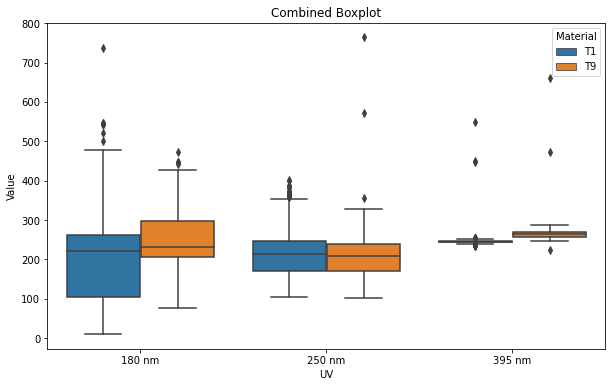

In [43]:
# Create a combined boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x="UV", y="Value", hue="Material")
plt.title("Combined Boxplot")

In [44]:
melted_df['Value'].describe()

count    2430.000000
mean      233.835226
std        73.864953
min        10.200000
25%       200.400000
50%       243.100000
75%       262.000000
max       763.800000
Name: Value, dtype: float64

<AxesSubplot:xlabel='T1', ylabel='Count'>

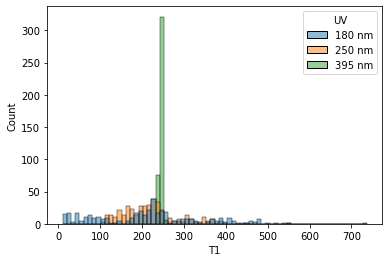

In [45]:
sns.histplot(data=df, x="T1", hue="UV")

<AxesSubplot:xlabel='T1', ylabel='Density'>

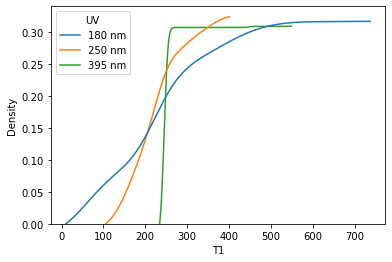

In [46]:
sns.kdeplot(data=df, x="T1", hue="UV", cut=0, cumulative=True)

<AxesSubplot:xlabel='T9', ylabel='Count'>

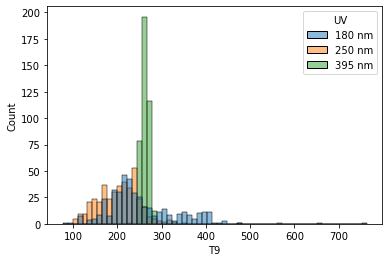

In [47]:
sns.histplot(data=df, x="T9", hue="UV")

<AxesSubplot:xlabel='T9', ylabel='Density'>

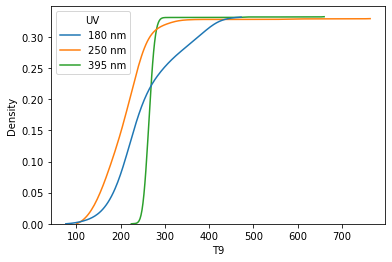

In [48]:
sns.kdeplot(data=df, x="T9", hue="UV", cut=0, cumulative=True)

In [49]:
import datetime

# Mapping of times to labels
time_labels = {
    '1900-01-01 00:00:00': '$T_0$',
    '1900-01-01 05:00:00': '$T_1$',
    '1900-01-01 10:00:00': '$T_2$',
    '1900-01-01 15:00:00': '$T_3$',
    '1900-01-01 20:00:00': '$T_4$',
    '1900-01-02 01:00:00': '$T_5$',
    '1900-01-02 06:00:00': '$T_6$',
    '1900-01-02 11:00:00': '$T_7$',
    '1900-01-02 16:00:00': '$T_8$',
    '1900-01-02 21:00:00': '$T_9$',
    '1900-01-03 02:00:00': '$T_{10}$',
    '1900-01-03 07:00:00': '$T_{11}$',
    '1900-01-03 12:00:00': '$T_{12}$',
    '1900-01-03 17:00:00': '$T_{13}$',
    '1900-01-03 22:00:00': '$T_{14}$'
}


# Convert 'H' column values to strings
melted_df['Time'] = melted_df['Time'].astype(str)

melted_df['Time']

0       1900-01-01 00:00:00
1       1900-01-01 00:00:00
2       1900-01-01 00:00:00
3       1900-01-01 00:00:00
4       1900-01-01 00:00:00
               ...         
2425    1900-01-03 22:00:00
2426    1900-01-03 22:00:00
2427    1900-01-03 22:00:00
2428    1900-01-03 22:00:00
2429    1900-01-03 22:00:00
Name: Time, Length: 2430, dtype: object

In [50]:
# Create a new column with labels
melted_df['Time_Label'] = melted_df['Time'].map(time_labels)

melted_df.head()

,Temperatura,Hr,UV,Muestra,Time,HOUR,Material,Value,Measurement,Time_Label
0,15.0,0.79,180 nm,1,1900-01-01 00:00:00,0.0,T1,280.8,T1_180,$T_0$
1,15.0,0.79,180 nm,2,1900-01-01 00:00:00,0.0,T1,243.2,T1_180,$T_0$
2,15.0,0.79,180 nm,3,1900-01-01 00:00:00,0.0,T1,242.6,T1_180,$T_0$
3,15.0,0.79,180 nm,4,1900-01-01 00:00:00,0.0,T1,251.6,T1_180,$T_0$
4,15.0,0.79,180 nm,5,1900-01-01 00:00:00,0.0,T1,247.6,T1_180,$T_0$


In [51]:
#melted_df = 
melted_df.drop(melted_df[melted_df['Value']>546.3].index, inplace=True)
melted_df.drop(melted_df[(melted_df['UV']=='395 nm')& (melted_df['Value']>400)].index, inplace=True)

In [52]:
# Find the 75th and 25th percentiles
value_seventy_fifth = melted_df["Value"].quantile(0.75)
value_twenty_fifth = melted_df["Value"].quantile(0.25)

# Calculate iqr
value_iqr = value_seventy_fifth - value_twenty_fifth

# Calculate the thresholds
upper = value_seventy_fifth + (4.5 * value_iqr)
lower = value_twenty_fifth - (1.5 *value_iqr)

# Subset the data
#planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

melted_df[melted_df['Value']<550]
# Count and print the number of outliers
#print(len(outliers))

print(upper)

537.0000000000001


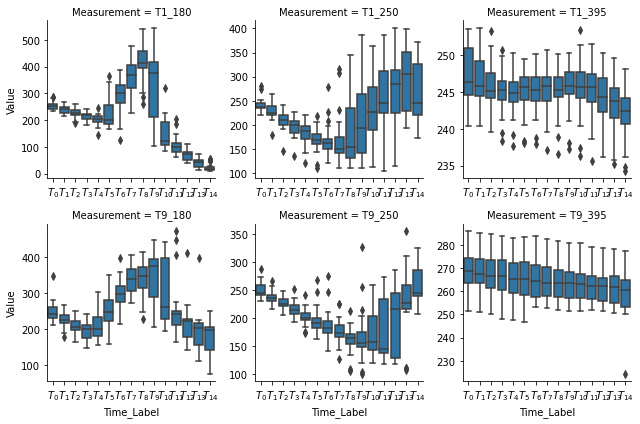

In [53]:
g = sns.FacetGrid(melted_df,col="Measurement",col_wrap=3,sharex=False, sharey=False, margin_titles=True)
g.map(sns.boxplot, "Time_Label", "Value", order=['$T_0$','$T_1$','$T_2$','$T_3$','$T_4$','$T_5$','$T_6$', '$T_7$', '$T_8$', '$T_9$','$T_{10}$','$T_{11}$','$T_{12}$','$T_{13}$','$T_{14}$'])


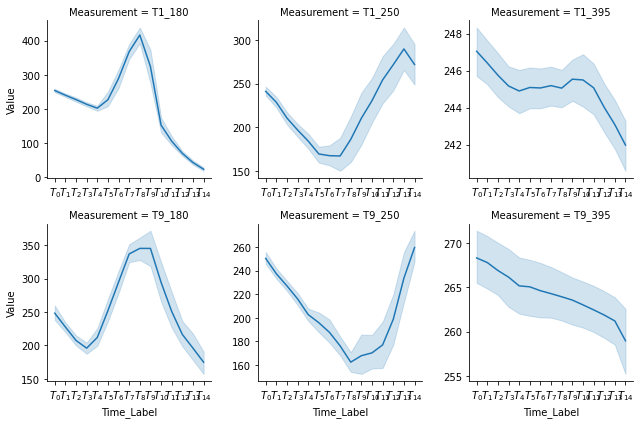

In [54]:
g = sns.FacetGrid(melted_df,col="Measurement",col_wrap=3,sharex=False, sharey=False, margin_titles=True)
g.map(sns.lineplot, "Time_Label", "Value")



sns.relplot(
    data=df[df['UV']=='180 nm'], x="Time", y="T1",
    col="Muestra",
    kind="scatter"
)

In [55]:
melted_df.groupby('Measurement').describe()

Temperatura                                                    \
                  count       mean       std  min   25%   50%   75%   max   
Measurement                                                                 
T1_180            403.0  14.166005  3.035890  9.5  11.0  14.3  17.6  19.1   
T1_250            405.0  14.366667  3.123617  9.5  11.2  15.0  17.0  20.0   
T1_395            402.0  14.221642  3.008426  9.5  11.0  14.9  17.0  19.6   
T9_180            405.0  14.146667  3.041271  9.5  11.0  14.3  17.6  19.1   
T9_250            403.0  14.366253  3.122969  9.5  11.2  15.0  17.0  20.0   
T9_395            403.0  14.223573  3.007406  9.5  11.0  14.9  17.0  19.6   

                Hr            ...  HOUR        Value                          \
             count      mean  ...   75%   max  count        mean         std   
Measurement                   ...                                              
T1_180       403.0  0.724045  ...  55.0  70.0  403.0  210.219851  123.394040   
T1_250       405.0  0.734000  ...  55.0  70.0  405.0  218.572099   64.765625   
T1_395       402.0  0.729430  ...  55.0  70.0  402.0  244.987065    3.487288   
T9_180       405.0  0.724000  ...  55.0  70.0  405.0  253.036790   73.304951   
T9_250       403.0  0.734516  ...  55.0  70.0  403.0  204.326799   45.095121   
T9_395       403.0  0.729878  ...  55.0  70.0  403.0  264.200496    8.115083   

                                                   
               min      25%    50%     75%    max  
Measurement                                        
T1_180        10.2  104.500  219.4  260.80  546.3  
T1_250       105.3  171.200  214.5  245.60  401.6  
T1_395       234.3  243.425  245.2  247.10  253.7  
T9_180        76.3  206.300  231.8  298.20  472.3  
T9_250       100.6  170.500  208.4  237.85  356.2  
T9_395       224.3  257.600  264.2  269.65  286.2  

[6 rows x 40 columns]

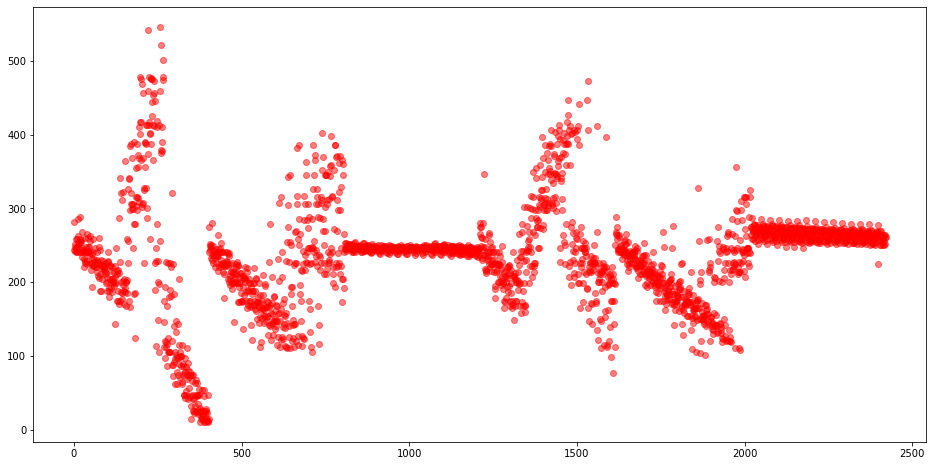

In [56]:
# Create a list of consecutive integers
integers = range(len(melted_df))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers, melted_df['Value'], c='red', alpha=0.5)
plt.show()

<AxesSubplot:xlabel='Value'>

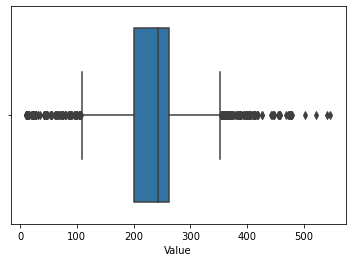

In [57]:
sns.boxplot(data= melted_df,x='Value')

In [35]:
# Removing some outliers
#melted_df = melted_df[melted_df['Value']<550]

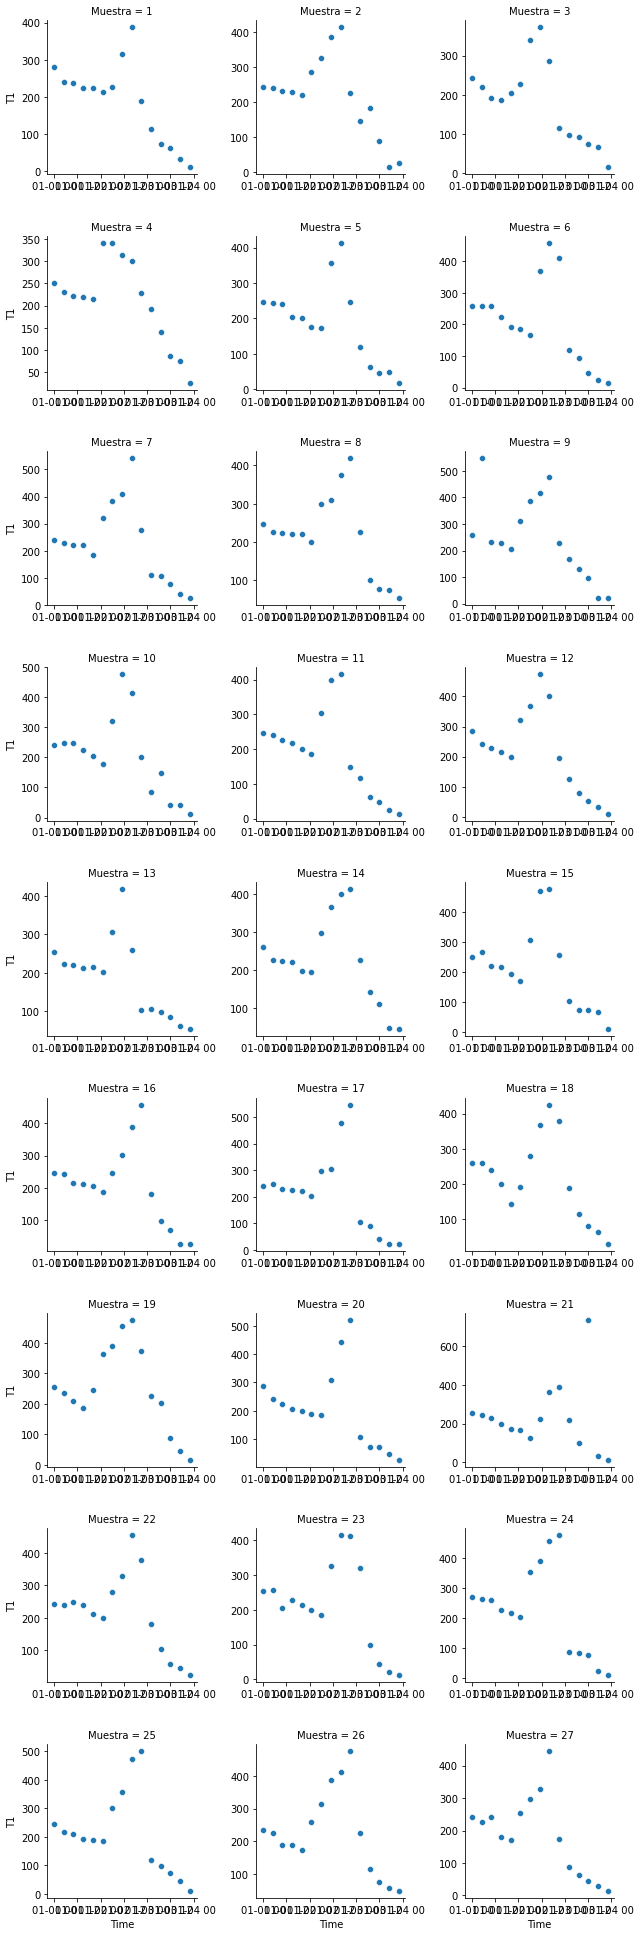

In [58]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='180 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()


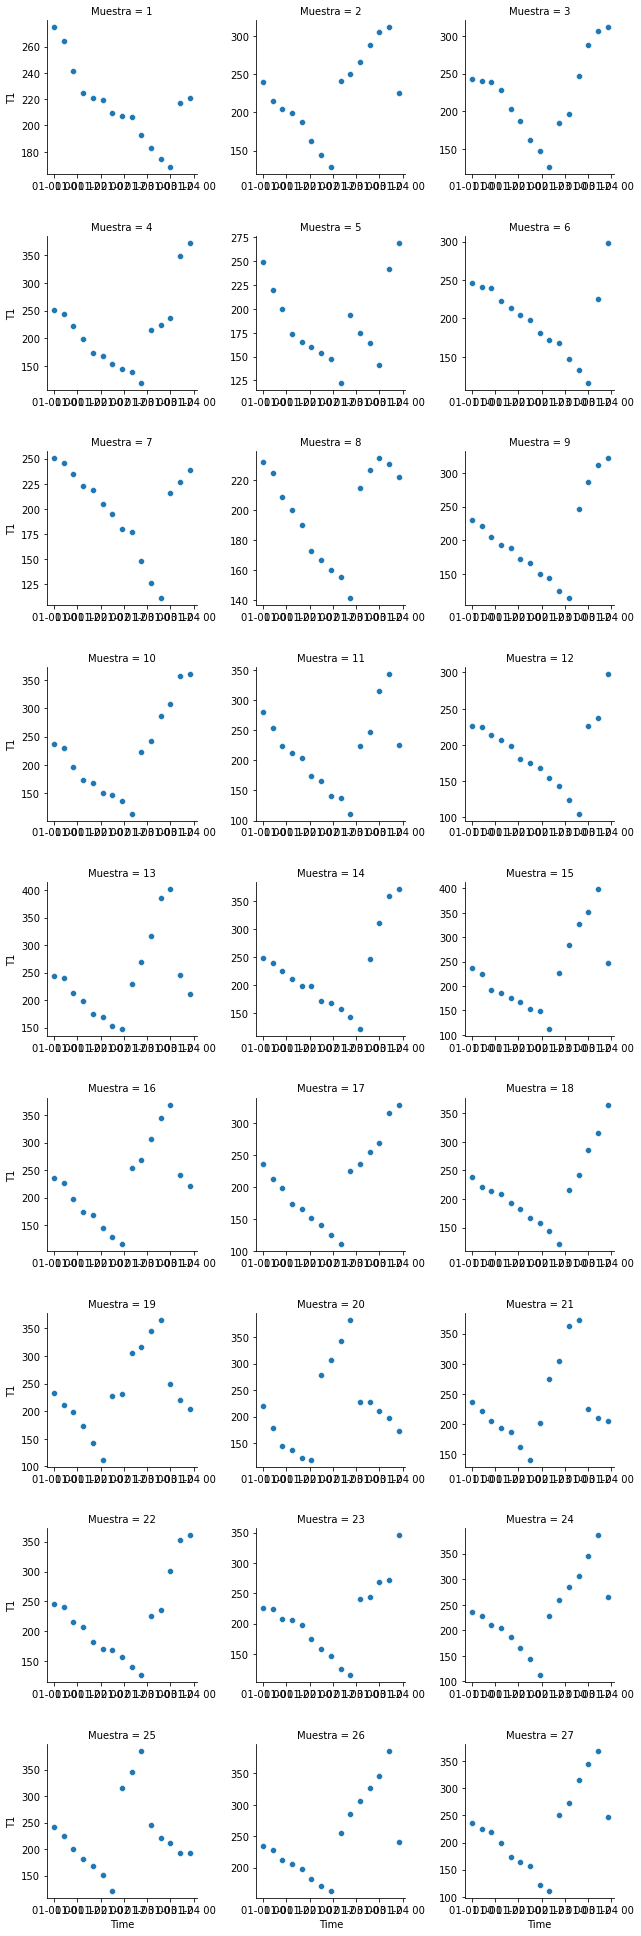

In [17]:
# Create a 9x3 grid of plots using FacetGrid
g = sns.FacetGrid(
    data=df[df['UV']=='250 nm'], col="Muestra",
    col_wrap=3,  # Number of columns
    height=3, aspect=1,sharex=False, sharey=False  # Adjust plot size and aspect ratio
)

# Plot scatter plots in each subplot
g.map(sns.scatterplot, "Time", "T1")

g.fig.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust spacing between subplots
plt.show()

In [60]:
melted_df.head()

,Temperatura,Hr,UV,Muestra,Time,HOUR,Material,Value,Measurement,Time_Label
0,15.0,0.79,180 nm,1,1900-01-01 00:00:00,0.0,T1,280.8,T1_180,$T_0$
1,15.0,0.79,180 nm,2,1900-01-01 00:00:00,0.0,T1,243.2,T1_180,$T_0$
2,15.0,0.79,180 nm,3,1900-01-01 00:00:00,0.0,T1,242.6,T1_180,$T_0$
3,15.0,0.79,180 nm,4,1900-01-01 00:00:00,0.0,T1,251.6,T1_180,$T_0$
4,15.0,0.79,180 nm,5,1900-01-01 00:00:00,0.0,T1,247.6,T1_180,$T_0$


In [59]:
melted_df.corr()

,Temperatura,Hr,Muestra,HOUR,Value
Temperatura,1.000000,-0.342447,-0.000748,-0.214010,0.045614
Hr,-0.342447,1.000000,0.003396,-0.567930,0.089967
Muestra,-0.000748,0.003396,1.000000,-0.001890,0.034759
HOUR,-0.214010,-0.567930,-0.001890,1.000000,-0.111464
Value,0.045614,0.089967,0.034759,-0.111464,1.000000


<AxesSubplot:>

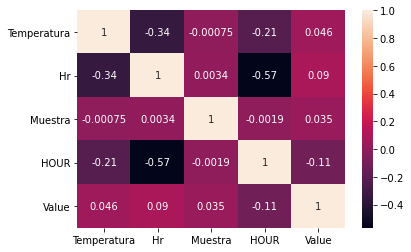

In [61]:
sns.heatmap(melted_df.corr(), annot=True)

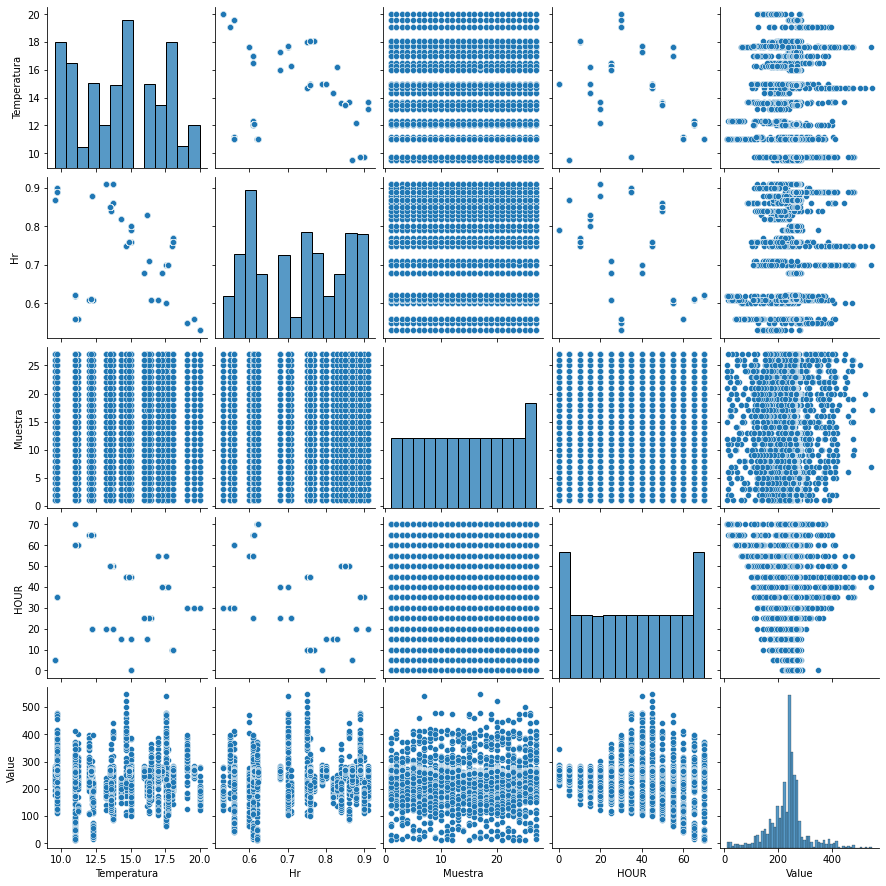

In [62]:
sns.pairplot(data=melted_df)

In [63]:
print(melted_df["Measurement"].value_counts())

T9_180    405
T1_250    405
T9_395    403
T1_180    403
T9_250    403
T1_395    402
Name: Measurement, dtype: int64
